In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Created a dataframe from the insurance.csv file

In [40]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Analysis
 <li>Columns: Sex, Smoker and Region has object data-type which we have to convert into the categorical format to perform the linear regression.</li><li>We can not perform the mathematical operation on object datatype, so we have to convert this data into the categorical format to get finite list of text values and then we have to perform onehot encoding on that finite list of values to understand the categorical data in form of binary vector.</li>

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<li> Converting object data to categorical data </li>

In [42]:
df['sex'] = df.sex.astype("category")
df.smoker = df.smoker.astype("category")
df.region = df.region.astype("category")

<li> Checking if is there any NA value in the dataset.</li>

In [43]:
df.isnull().values.any()

False

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


#### Checking Correlation between the data
There is no correlation in our dataset

<AxesSubplot:>

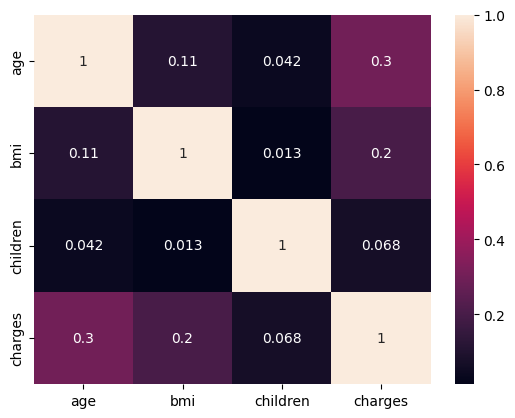

In [45]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

### Extracting the features and the dependent column
Features are:<ol><li>age</li> <li>sex</li> <li>bmi</li> <li>children</li> <li>smoker</li> </ol>
Dependent value: <li> charges </li>

In [46]:
x = df.iloc[:,:6]
Y = df.iloc[:,-1]
print(f"features:\n{x.head(10)}\n\n Charges:\n{Y.head(10)}")
x.shape, Y.shape

features:
   age     sex     bmi  children smoker     region
0   19  female  27.900         0    yes  southwest
1   18    male  33.770         1     no  southeast
2   28    male  33.000         3     no  southeast
3   33    male  22.705         0     no  northwest
4   32    male  28.880         0     no  northwest
5   31  female  25.740         0     no  southeast
6   46  female  33.440         1     no  southeast
7   37  female  27.740         3     no  northwest
8   37    male  29.830         2     no  northeast
9   60  female  25.840         0     no  northwest

 Charges:
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
6     8240.58960
7     7281.50560
8     6406.41070
9    28923.13692
Name: charges, dtype: float64


((1338, 6), (1338,))

## Data Pre-processing
converting categorical data into the binary format with the help of pandas 'get_dummies' method.
Here we used drop_first parameter to ensure there is no reference columns so that the remaining columns become linearly independent.

In [47]:
# help(pd.get_dummies)
encoded_data = pd.get_dummies(x, columns = ['sex', 'smoker', 'region'], drop_first=True)
X = encoded_data
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


## Scaling the data
With use of MinMaxScaler reduce the the parameter value which can help us to calcute large dataset in shorter time, To reduce the time and calculation complexity here we have used scaler method

In [48]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, confusion_matrix

In [49]:
features = X.columns.values
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

## Spliting the data
Here we have split the data into train and test parts and use random state parameter to shuffle the data identically every time in order to get replicable result. we need to shuffle the data to cover all possible combination of feature values to train our dataset.

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=2)
x_train

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
882,0.065217,0.166129,0.0,0.0,0.0,0.0,0.0,0.0
505,0.413043,0.401264,0.6,1.0,0.0,1.0,0.0,0.0
798,0.869565,0.461125,0.0,0.0,0.0,0.0,0.0,1.0
792,0.086957,0.194243,0.0,0.0,0.0,0.0,0.0,0.0
201,0.652174,0.437719,0.2,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
466,0.913043,0.342750,0.2,0.0,0.0,0.0,0.0,1.0
299,0.652174,0.347592,0.2,0.0,0.0,1.0,0.0,0.0
493,0.934783,0.738230,0.0,1.0,0.0,0.0,0.0,1.0
527,0.717391,0.264730,0.2,0.0,0.0,0.0,0.0,1.0


## Linear Regression
### Preparing model and training our dataset on linear regression

In [51]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

<li>Extracting the values of coeffiecient and intercept</li>

In [52]:
model_coefficient = pd.DataFrame(model.coef_, X.columns, columns=['coefficient'])
model_coefficient

,coefficient
age,11556.380547
bmi,12371.020279
children,2939.626551
sex_male,-37.122401
smoker_yes,23912.345230
region_northwest,-379.189963
region_southeast,-784.484360
region_southwest,-947.238184


In [53]:
model.intercept_

-1925.3412066326182

### Designed a function which can predict the charges as per the given parameters

In [54]:
def predict_charges(x):
    w = model.coef_
    b = model.intercept_
    y = np.dot(w.T,x) + b
    return y

In [55]:
predict_charges(np.array([10, 23.845, 1, 0, 0, 0, 0, 1]))

410617.8311740182

In [56]:
train_score = model.score(x_train,y_train)
print(f'train score is: {train_score*100:.2f}%')

train score is: 75.20%


### R2 Score is used to evaluate the performance of our linear regression model.

In [57]:
y_predict = model.predict(x_test)
print(f"R2 Score: {r2_score(y_test, y_predict)*100:.2f}%")

R2 Score: 74.49%


### Difference between the actual and predicted values

In [65]:
y_predict_df = pd.DataFrame(y_predict, columns=['predicted_charges'], index=x_test.index)
df_prediction= pd.concat([x_test, y_test, y_predict_df], axis=1)
df_prediction.rename(columns = {'charges':'actual_charges'}, inplace = True)
difference = pd.concat([df_prediction,y_test-y_predict], axis=1)
difference.rename(columns = {'charges':'difference'}, inplace = True)
difference.head(20)

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,actual_charges,predicted_charges,difference
17,0.108696,0.212133,0.0,1.0,0.0,0.0,0.0,0.0,2395.17155,1917.971813,477.199737
1091,0.804348,0.373150,0.0,0.0,0.0,0.0,0.0,0.0,11286.53870,11986.259407,-699.720707
273,0.695652,0.309255,0.2,1.0,0.0,0.0,0.0,0.0,9617.66245,10490.480050,-872.817600
270,0.000000,0.360775,0.2,1.0,0.0,0.0,1.0,0.0,1719.43630,2304.129938,-584.693638
874,0.565217,0.158461,0.6,1.0,0.0,0.0,0.0,0.0,8891.13950,8293.505374,597.634126
790,0.456522,0.695184,0.0,0.0,0.0,0.0,1.0,0.0,5662.22500,11166.052308,-5503.827308
957,0.130435,0.291364,0.2,1.0,0.0,1.0,0.0,0.0,12609.88702,3358.095716,9251.791304
492,0.000000,0.245359,0.0,0.0,0.0,0.0,0.0,0.0,2196.47320,1110.001945,1086.471255
1125,0.978261,0.245359,0.0,0.0,0.0,1.0,0.0,0.0,14254.60820,12035.966865,2218.641335
794,0.456522,0.429379,0.4,0.0,0.0,1.0,0.0,0.0,7209.49180,9458.908911,-2249.417111


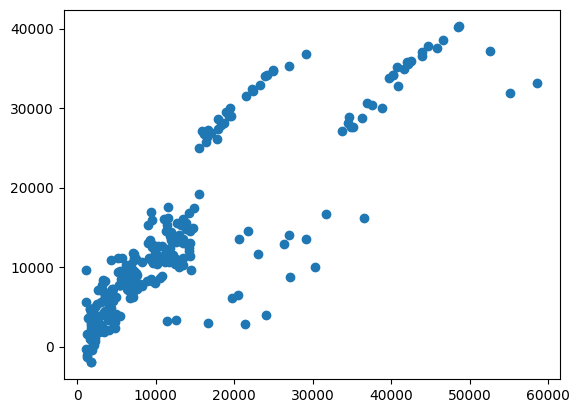

In [59]:
plt.scatter(y_test, y_predict)

## P-value and F-Statistic
P-value for sex_male and region_northeast is too high. It means that deviation from the null hypothesis is not statistically significant, and the null hypothesis is not rejected., While other columns has p-value less than 0.05 and it is typically considered to be statistically significant, in which case the null hypothesis should be rejected.<br>
For southeast and southwest, p-value is near to the 0.05 but less than that so we can consider it as statistically significant.<br>
<li>F-statistic can be used to understand if the given set of predictor variables are significant in explaining the variance of the dependent variable.</li>
<li>T-test will tell us if a single variable is statistically significant and an F test will tell us if a group of variables are jointly significant.</li>
<u>Prob(F-statistic): 0.00</u> means group of features are together rejects the null hypothesis.

In [60]:
import statsmodels.api as sm
x_sm = sm.add_constant(X)
sm_model = sm.OLS(endog=Y,exog=x_sm).fit()
sm_predictions = sm_model.predict(x_sm)
print(f"prediction: {r2_score(Y, sm_predictions)}")
sm_model.summary()

prediction: 0.7509130345985207


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Thu, 08 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:34:02   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1901.5967    586.973     -3.240      0.001   -3053.091    -750.103
age               1.182e+04    547.347     21.587      0.000    1.07e+04    1.29e+04
bmi               1.261e+04   1063.042     11.860      0.000    1.05e+04    1.47e+04
children          2377.5027    689.020      3.451      0.001    1025.816    3729.189
sex_male          -131.3144    332.945     -0.394      0.693    -784.470     521.842
smoker_yes        2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
region_northwest  -352.9639    476.276     -0.741      0.459   -1287.298     581.370
region_southeast -1035.0220    478.692     -2.162      0.031   -1974.097     -95.947
region_southwest  -960.0510    477.933     -2.009      0.045   -1897.636     -22.466
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         9.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Experiment
##### Let's Check the F-statistcs with out dropping the first column of our categorical data.
Here, we can observe that 'sex_female, sex_male' and 'region_southwest, region_southeast, region_northwest, region_northeast' have higher p-values which means these are linearly dependent and together these column won't add any value to our dataset for that reason we have used the drop_first parameter in our original code.

In [61]:
encoded_data = pd.get_dummies(x, columns = ['sex', 'smoker', 'region'])
X = encoded_data
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [62]:
import statsmodels.api as sm
x_sm = sm.add_constant(X)
sm_model = sm.OLS(endog=Y,exog=x_sm).fit()
sm_predictions = sm_model.predict(x_sm)
print(f"prediction: {r2_score(Y, sm_predictions)}")
sm_model.summary()

prediction: 0.7509130345985207


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Thu, 08 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:34:02   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -296.4168    430.507     -0.689      0.491   -1140.964     548.130
age                256.8564     11.899     21.587      0.000     233.514     280.199
bmi                339.1935     28.599     11.860      0.000     283.088     395.298
children           475.5005    137.804      3.451      0.001     205.163     745.838
sex_female         -82.5512    269.226     -0.307      0.759    -610.706     445.604
sex_male          -213.8656    274.976     -0.778      0.437    -753.299     325.568
smoker_no        -1.207e+04    282.338    -42.759      0.000   -1.26e+04   -1.15e+04
smoker_yes        1.178e+04    313.530     37.560      0.000    1.12e+04    1.24e+04
region_northeast   512.9050    300.348      1.708      0.088     -76.303    1102.113
region_northwest   159.9411    301.334      0.531      0.596    -431.201     751.083
region_southeast  -522.1170    330.759     -1.579      0.115   -1170.983     126.749
region_southwest  -447.1459    310.933     -1.438      0.151   -1057.119     162.827
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                     4.55e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.7e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""